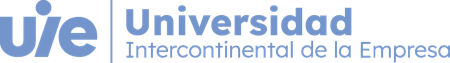

**G24GXX3.10X. Aprendizaje Automático**

**Profesor: Borja González Seoane**

Curso 2024-25

In [ ]:
__author__ = "Manuel Mateo Delgado"

# PL06. Clusterización

En esta práctica se utilizará la implementación de *K-means* _scracth_ alcanzada en el _notebook_ anterior, la cual será contrastada con la implementación de la librería Scikit-Learn. Para poner a prueba los algoritmos de clusterización, se utilizará el conjunto de datos [_Facebook Live Sellers in Thailand_](https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand) de UCI Machine Learning Repository. Este conjunto de datos describe transmisiones en vivo de vendedores tailandeses en Facebook.

Se debe importar el conjunto de datos, realizar un breve EDA para entender la estructura de los datos y proceder con las correspondientes transformaciones. Posteriormente, se deberán utilizar las implementaciones de *K-means* mencionadas usando el método del codo para determinar el número óptimo de clústeres.


In [529]:
import numpy as np

from typing import Optional

import matplotlib.pyplot as plt
from matplotlib import cm
import sklearn 
import sklearn.datasets
import sklearn.model_selection
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler


from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans, DBSCAN

import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [530]:
TEST_SPLIT_SIZE = 0.2
RANDOM_STATE = 23

# Set NumPy's random seed
np.random.seed(RANDOM_STATE)

## Carga del conjunto de datos

In [531]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
facebook_live_sellers_in_thailand = fetch_ucirepo(id=488) 
  
# data (as pandas dataframes) 
X = facebook_live_sellers_in_thailand.data.features 
y = facebook_live_sellers_in_thailand.data.targets 
  
# metadata 
print(facebook_live_sellers_in_thailand.metadata) 
  
# variable information 
print(facebook_live_sellers_in_thailand.variables) 


{'uci_id': 488, 'name': 'Facebook Live Sellers in Thailand', 'repository_url': 'https://archive.ics.uci.edu/dataset/488/facebook+live+sellers+in+thailand', 'data_url': 'https://archive.ics.uci.edu/static/public/488/data.csv', 'abstract': 'Facebook pages of 10 Thai fashion and cosmetics retail sellers. Posts of a different nature (video, photos, statuses, and links). Engagement metrics consist of comments, shares, and reactions.', 'area': 'Business', 'tasks': ['Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 7051, 'num_features': 11, 'feature_types': ['Integer'], 'demographics': [], 'target_col': None, 'index_col': ['status_id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C5R60S', 'creators': ['Nassim Dehouche'], 'intro_paper': {'ID': 454, 'type': 'NATIVE', 'title': 'Dataset on usage and engagement patterns for Facebook Live sellers in Thailand', 'authors': '

In [532]:
#Creamos un dataframe
df = pd.DataFrame(data=X, columns=facebook_live_sellers_in_thailand.X)
display(df)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [533]:
#Creamos un csv que nos resultará útil para seguir tratando los datos
df.to_csv('facebook.csv', index=False)

## EDA del conjunto de datos

Detección y tratamiento de valores nulos, _outliers_, etc. Eliminación de columnas no relevantes.

In [534]:
#Comprobacion de valores nulos
df.isnull().sum()

status_type         0
status_published    0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
dtype: int64

In [535]:
#Comprobacion de valores duplicados
df.duplicated().sum()

54

In [536]:
#Comprbamos dimensiones de la tabla
df.shape

#Mas detallado
print(f"numero de filas: {df.shape[0]}.")
print(f"numero de columnas: {df.shape[1]}.")

numero de filas: 7050.
numero de columnas: 11.


In [537]:
#Suprimimos valores duplicados
df.drop_duplicates()



,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


In [538]:
cols_numericas = ["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]

In [539]:
for col in cols_numericas:  #
    fig=px.violin(
        X,
        y=col,
        
        box=True, points="all",  #para añacir tambien los diagramas de cajas
        title=col,
        labels={col:col}
    )
    fig.show()

## Codificación de variables categóricas

In [540]:
df["status_published"].value_counts()

status_published
3/20/2018 1:54     3
12/28/2017 8:09    2
4/30/2018 6:20     2
4/26/2018 19:00    2
4/23/2018 7:26     2
                  ..
9/6/2012 9:01      1
9/6/2012 9:16      1
9/6/2012 23:17     1
9/7/2012 0:21      1
9/10/2016 10:30    1
Name: count, Length: 6913, dtype: int64

In [541]:
#unificamos segun mismo año y mes

df['status_published'] = pd.to_datetime(df['status_published'])

df['status_published_Y'] = df['status_published'].dt.to_period('Y') 

df =df.drop(columns=["status_published"])

#Verificamos 
print(df)

     status_type  num_reactions  num_comments  num_shares  num_likes  \
0          video            529           512         262        432   
1          photo            150             0           0        150   
2          video            227           236          57        204   
3          photo            111             0           0        111   
4          photo            213             0           0        204   
...          ...            ...           ...         ...        ...   
7045       photo             89             0           0         89   
7046       photo             16             0           0         14   
7047       photo              2             0           0          1   
7048       photo            351            12          22        349   
7049       photo             17             0           0         17   

      num_loves  num_wows  num_hahas  num_sads  num_angrys status_published_Y  
0            92         3          1         1         

In [542]:
df["status_published_Y"].value_counts()

status_published_Y
2018    2550
2017    2253
2012     589
2016     588
2013     500
2015     337
2014     233
Freq: Y-DEC, Name: count, dtype: int64

In [543]:
#Convertimas variables categoricas a numericas
df = pd.get_dummies(df, columns=["status_type", "status_published_Y"], drop_first=True).astype(int)


df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_photo,status_type_status,status_type_video,status_published_Y_2013,status_published_Y_2014,status_published_Y_2015,status_published_Y_2016,status_published_Y_2017,status_published_Y_2018
0,529,512,262,432,92,3,1,1,0,0,0,1,0,0,0,0,0,1
1,150,0,0,150,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,227,236,57,204,21,1,1,0,0,0,0,1,0,0,0,0,0,1
3,111,0,0,111,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,213,0,0,204,9,0,0,0,0,1,0,0,0,0,0,0,0,1


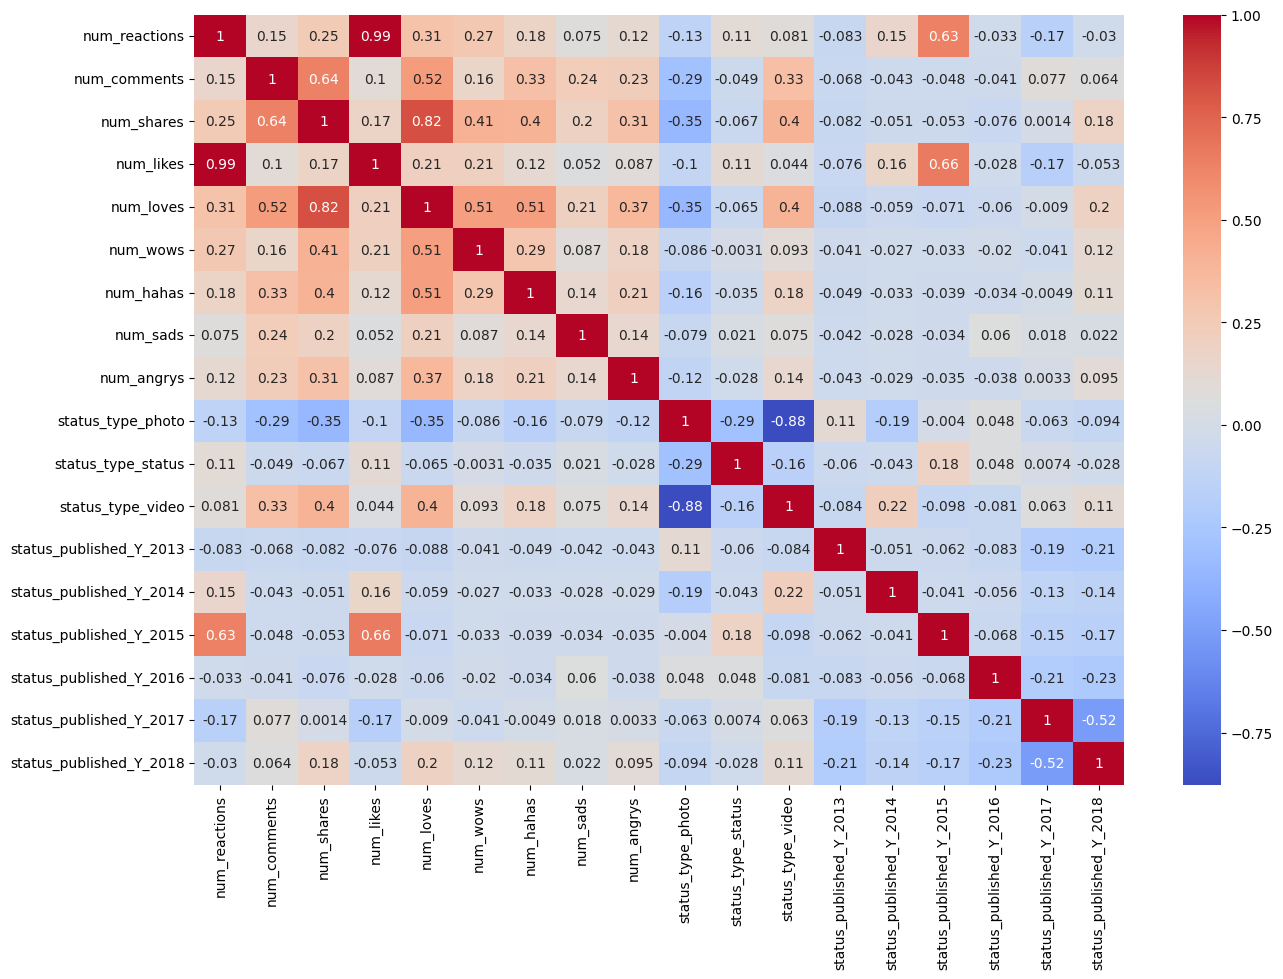

In [544]:
#Grafico de correlacion
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()


## Escalado de variables

*K-means* es un algoritmo basado en distancias, por lo que es conveniente escalar las variables para que todas tengan el mismo peso.

In [545]:
#Normalizamos las variables
scaler=MinMaxScaler()
for columna in df:
    df[f"{columna}_norm_sklearn2"]=scaler.fit_transform(df[[columna]])

In [546]:
for columna in df:
    df_std=df.drop(["num_reactions", "num_comments", "num_shares", "num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys","status_type_photo",	"status_type_status",	"status_type_video",	"status_published_Y_2013",	"status_published_Y_2014",	"status_published_Y_2015",	"status_published_Y_2016",	"status_published_Y_2017",	"status_published_Y_2018"],axis=1)
df_std

,num_reactions_norm_sklearn2,num_comments_norm_sklearn2,num_shares_norm_sklearn2,num_likes_norm_sklearn2,num_loves_norm_sklearn2,num_wows_norm_sklearn2,num_hahas_norm_sklearn2,num_sads_norm_sklearn2,num_angrys_norm_sklearn2,status_type_photo_norm_sklearn2,status_type_status_norm_sklearn2,status_type_video_norm_sklearn2,status_published_Y_2013_norm_sklearn2,status_published_Y_2014_norm_sklearn2,status_published_Y_2015_norm_sklearn2,status_published_Y_2016_norm_sklearn2,status_published_Y_2017_norm_sklearn2,status_published_Y_2018_norm_sklearn2
0,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7046,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7047,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7048,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Clusterización usando _K-means_ _Scratch_

Úsese el método de Elbow para determinar el número óptimo de clústeres.

In [547]:
inertias=[]


K = range(1,7) 
for k in K:
    kmeanModel = KMeans(n_clusters=k) 
    kmeanModel.fit(df_std) 
    inertias.append(kmeanModel.inertia_) 

inertias

[8501.2377813399,
 5586.237666714376,
 4303.2454104365925,
 3424.6952491040247,
 2914.7206615955897,
 2248.5480286864045]

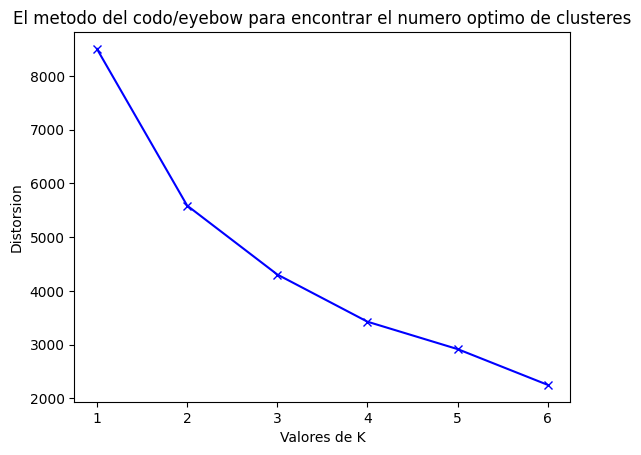

In [548]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Valores de K')
plt.ylabel('Distorsion')
plt.title('El metodo del codo/eyebow para encontrar el numero optimo de clusteres')
plt.show()

In [549]:
X_train, X_test = train_test_split(df_std, test_size=TEST_SPLIT_SIZE, random_state=RANDOM_STATE)

X_train.shape, X_test.shape

((5640, 18), (1410, 18))

In [550]:
#Convertimos X_train y X_test en arrays de NumPy
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [551]:

# Esqueleto de la clase a implementar

class KMeansScratch:
    def __init__(self,k:int, max_iter:int=1000, random_state: Optional[int]=None):  # Constructor de la clase. Impleméntese si es necesario

        self.k=k #numero de clusteres
        self.max_iter:int=1000
        self.random_state = random_state

        self._centroides = None #no lo podemos inicializar aqui porque no sabemos, lo tenosmo que inicializar en los centrosides
        self._inercia = None
    def fit(self, X: np.ndarray): #en otras clases faltaria la y, pero en este caso no es necesario ponerla en los parametros
        """ vamos a ajustar los datos """
        """ vamos a calcular los centroides de cada grupo """
        self._centroides = X[np.random.RandomState(self.random_state).choice(X.shape[0], self.k, replace=False)] #esta linea es para inicializar los centroides de manera aleatoria en el espacio de los datos que tenemos en X y que no se repitan los centroides

        iters = self.max_iter
        while iters > 0:
            clusteres = self.__asignar_clusteres(X)

            nuevos_centroides = self.__actualizar_centroides(X, clusteres)

            if np.all(self._centroides == nuevos_centroides):
                break
            else:
                self._centroides = nuevos_centroides
                iters -= 1

    def predict(self, X: np.ndarray) -> np.ndarray:
        return self.__asignar_clusteres(X)
    
    def __asignar_clusteres(self, X: np.ndarray) -> np.ndarray:#no le pasamos k porqu eya esta incluido en el self
        """ vamos a asignar los clusteres """
        distancias = np.zeros((X.shape[0], self.k)) #inicializamos las distancias a 0 
        for k in range(self.k):
            distancias[:, k] = np.sum((X - self._centroides[k])**2, axis=1) #[:,k] cogemos todas las instancias y la columna k, axis 1 es para que nos devuelva la distancia de cada punto a cada centroide, crea una matriz de n instancias por 3 columnas (k)
            #axis 1 es porque queremos que recorra para cada X una K especifica para poder calcular la distancia de cada punto a cada centroide (por eso se teine que recorrer en las columnas)
        self._inercia= np.sum(np.min(distancias, axis=1))    
        return np.argmin(distancias, axis=1) #nos quedamos con el indice del minimo
    
    def __actualizar_centroides(self, X: np.ndarray, clusteres: np.ndarray) -> None: #no le pasamos k porqu eya esta incluido en el self
        centroides = np.zeros((self.k, X.shape[1])) #inicializamos los centroides a 0 para que no haya problemas con la suma de los centroides
        for k in range(self.k):
            centroides[k] = np.mean(
                X[clusteres == k],
                axis=0) 
        return centroides

In [552]:
inertias=[]
K = range(1,5) #el ranfgo de clusteres que quiero comprobar
for k in K:
    kmeanModel = KMeansScratch(k=k,random_state=RANDOM_STATE) #creo el modelo 
    kmeanModel.fit(df_std.to_numpy()) #el objetivo del fit es encontrar los centroides de los clusters 
    inertias.append(kmeanModel._inercia) 

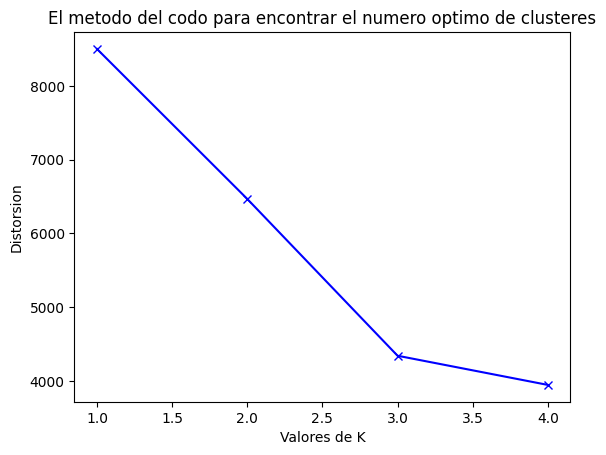

In [553]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Valores de K')
plt.ylabel('Distorsion')
plt.title('El metodo del codo para encontrar el numero optimo de clusteres')
plt.show()

In [554]:
modelo= KMeansScratch(k=3, random_state=RANDOM_STATE)
modelo.fit(X_train)
clusteres_train_Scratch = modelo.predict(X_train)
clusteres_test_Scratch = modelo.predict(X_test)

In [555]:
df_train = pd.DataFrame(X_train)

df_train['cluster'] = clusteres_train_Scratch
display(df_train.head())
cluster_analysis = df_train.groupby('cluster').describe()
print(cluster_analysis)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster
0,0.000849,0.000048,0.000000,0.000849,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,0.000212,0.000000,0.000000,0.000212,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.000425,0.000000,0.000000,0.000425,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,0.088323,0.343402,0.148657,0.077495,0.062405,0.014388,0.012739,0.078431,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0
4,0.004246,0.000000,0.000000,0.004246,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


              0                                                              \
          count      mean       std       min       25%       50%       75%   
cluster                                                                       
0        1686.0  0.051427  0.085574  0.000000  0.004671  0.030467  0.053662   
1        3446.0  0.038043  0.093263  0.000000  0.003185  0.007006  0.026964   
2         508.0  0.108660  0.133146  0.000212  0.015021  0.055414  0.154671   

                        1            ...   16           17            \
              max   count      mean  ...  75%  max   count      mean   
cluster                              ...                               
0        0.772611  1686.0  0.032806  ...  1.0  1.0  1686.0  0.478648   
1        0.916136  3446.0  0.000782  ...  1.0  1.0  3446.0  0.329948   
2        0.832059   508.0  0.001489  ...  0.0  1.0   508.0  0.192913   

                                            
              std  min  25%  50%  75%  max  
cl

In [556]:
df_test = pd.DataFrame(X_test)

# Añadir la etiqueta del clúster a los datos de entrenamiento
df_test['cluster'] = clusteres_test_Scratch

# Mostrar los primeros registros para verificar
display(df_test.head())

# Agrupar los datos por clúster y aplicar describe()
cluster_analysis = df_test.groupby('cluster').describe()

# Mostrar el análisis
print(cluster_analysis)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,cluster
0,0.011677,0.000476,0.000000,0.011677,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000425,0.000000,0.000000,0.000425,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
2,0.000637,0.000000,0.000292,0.000637,0.00000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,0.036306,0.000191,0.000292,0.035244,0.00761,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1
4,0.013800,0.000429,0.000000,0.013800,0.00000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2


             0                                                              \
         count      mean       std       min       25%       50%       75%   
cluster                                                                      
0        441.0  0.055354  0.087978  0.000000  0.005096  0.029512  0.059448   
1        842.0  0.040323  0.097795  0.000000  0.003185  0.007431  0.028822   
2        127.0  0.102982  0.143154  0.001274  0.013907  0.049045  0.124204   

                       1            ...   16          17                      \
              max  count      mean  ...  75%  max  count      mean       std   
cluster                             ...                                        
0        0.556476  441.0  0.036087  ...  1.0  1.0  441.0  0.498866  0.500567   
1        1.000000  842.0  0.000680  ...  1.0  1.0  842.0  0.307601  0.461775   
2        0.869214  127.0  0.000841  ...  0.5  1.0  127.0  0.228346  0.421429   

                                  
         min  2

In [557]:
k_optimo = 3 #el valor optimo de clusteres
modelo_final = KMeansScratch(k=k_optimo, random_state=RANDOM_STATE)
modelo_final.fit(df_std.to_numpy())
clusteres_final = modelo_final.predict(df_std.to_numpy())

display(clusteres_final)

array([1, 0, 1, ..., 0, 0, 0])

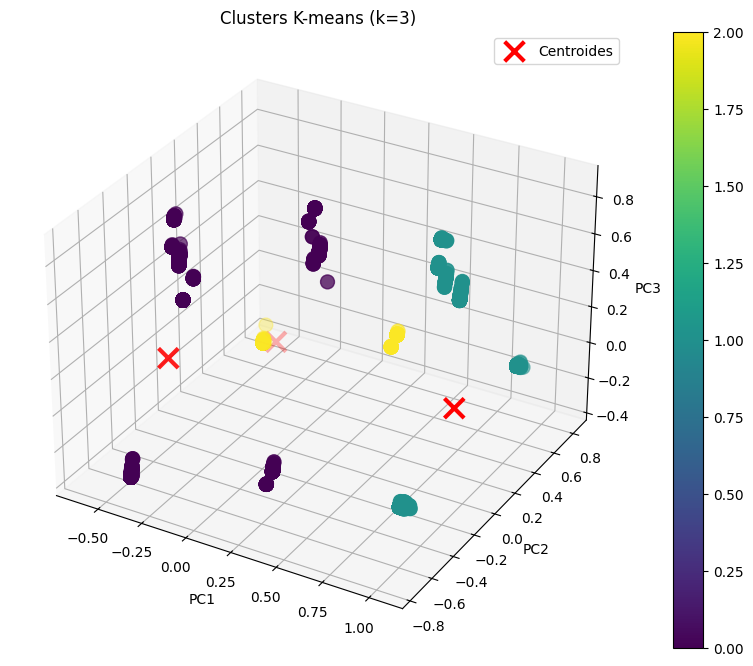

In [558]:
# Visualización 3D
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_std.to_numpy())
centroides_pca = pca.transform(modelo_final._centroides)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                    c=clusteres_final, cmap='viridis', s=100)
ax.scatter(centroides_pca[:, 0], centroides_pca[:, 1], centroides_pca[:, 2],
          c='red', marker='x', s=200, linewidth=3, label='Centroides')
plt.colorbar(scatter)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.title(f'Clusters K-means (k={k_optimo})')
plt.show()


## Clusterización usando _K-means_ de Scikit-Learn

### Prueba con inicialización `k-means++`

In [559]:
kmeans=KMeans(n_clusters=3, init="k-means++", random_state= RANDOM_STATE) 
kmeans.fit(df_std) #ajusta el modelo
# Convertir df_std a un array numpy 
if isinstance(df_std, pd.DataFrame):
    df_std = df_std.to_numpy()
# Convertir clusteres_train_Scratch a una Serie de pandas
clusteres_train_Scratch_series = pd.Series(clusteres_train_Scratch)

# Crear el gráfico de barras
fig = px.bar(
    x=clusteres_train_Scratch_series.value_counts().index,  # INDEX, le señalas que quieres que muestre, en este caso los nombres
    y=clusteres_train_Scratch_series.value_counts().values,  # values, le señalas que quieres que muestre, en este caso los valores
    labels={
        "x": "Cluster",
        "y": "Samples"
    },
    title="Número de elementos en cada clúster",
    color=clusteres_train_Scratch_series.value_counts().index
)

fig.show()

In [560]:
clusteres_train_Scikit = kmeans.predict(X_train)
clusteres_test_Scikit = kmeans.predict(X_test)

/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names

/Users/carlosillanaldariz/miniconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



## Explicabilidad de los clústeres

Comprobación de la distribución de instancias en los clústeres y caracterización de los mismos.

In [561]:
# Convertir clusteres_train_Scratch a una Serie de pandas
clusteres_train_Scratch_series = pd.Series(clusteres_train_Scratch)

#Creamos un gráfico de barras
fig = px.bar(
    x=clusteres_train_Scratch_series.value_counts().index, #señala los nombres
    y=clusteres_train_Scratch_series.value_counts().values,  #muestra los valores
    labels={
        "x": "Cluster",
        "y": "Samples"
    },
    title="Número de elementos en cada clúster",
    color=clusteres_train_Scratch_series.value_counts().index
)

fig.show()